<img src= "G:/My Drive/AMM Backup 6Abril22/AMM STUDIES/DATA SCIENSE - CURTIN UNIVERSITY/Project_1 ok/th.jpg">

# Happiness Classification      

### This Dataset is based on a survey conducted where people rated different metrics of their city on a scale of 5 and answered if they are happy or unhappy.


# Feature	Description

**infoavail**:	the availability of information about the city services

**housecost**:	the cost of housing

**schoolquality**:	the overall quality of public schools

**policetrust**:	your trust in the local police

**streetquality**:	the maintenance of streets and sidewalks

**events**:	the availability of social community events

**happy**: 	decision attribute (D) with values 0 (unhappy) and 1 (happy)

# Step 1

###import libraries

In [1]:
#import libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import roc_curve, auc

### load data


In [3]:
#load data
happy = '/content/happydata.csv'
hp = pd.read_csv(happy)
hp.head()

,infoavail,housecost,schoolquality,policetrust,streetquality,ëvents,happy
0,3,3,3,4,2,4,0
1,3,2,3,5,4,3,0
2,5,3,3,3,3,5,1
3,5,4,3,3,3,5,0
4,5,4,3,3,3,5,0


In [4]:
#change column name event to events
hp.rename(columns={'ëvents': 'events'}, inplace=True)
hp.head()

,infoavail,housecost,schoolquality,policetrust,streetquality,events,happy
0,3,3,3,4,2,4,0
1,3,2,3,5,4,3,0
2,5,3,3,3,3,5,1
3,5,4,3,3,3,5,0
4,5,4,3,3,3,5,0


# Step 2

### Exploratory Data Analysis

In [5]:
#check null values
hp.isnull().sum()

,0
infoavail,0
housecost,0
schoolquality,0
policetrust,0
streetquality,0
events,0
happy,0


In [6]:
# data info
hp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   infoavail      143 non-null    int64
 1   housecost      143 non-null    int64
 2   schoolquality  143 non-null    int64
 3   policetrust    143 non-null    int64
 4   streetquality  143 non-null    int64
 5   events         143 non-null    int64
 6   happy          143 non-null    int64
dtypes: int64(7)
memory usage: 7.9 KB


In [7]:
# data summary
hp.describe()

,infoavail,housecost,schoolquality,policetrust,streetquality,events,happy
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,4.314685,2.538462,3.265734,3.699301,3.615385,4.216783,0.538462
std,0.799820,1.118155,0.992586,0.888383,1.131639,0.848693,0.500271
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,4.000000,2.000000,3.000000,3.000000,3.000000,4.000000,0.000000
50%,5.000000,3.000000,3.000000,4.000000,4.000000,4.000000,1.000000
75%,5.000000,3.000000,4.000000,4.000000,4.000000,5.000000,1.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.000000


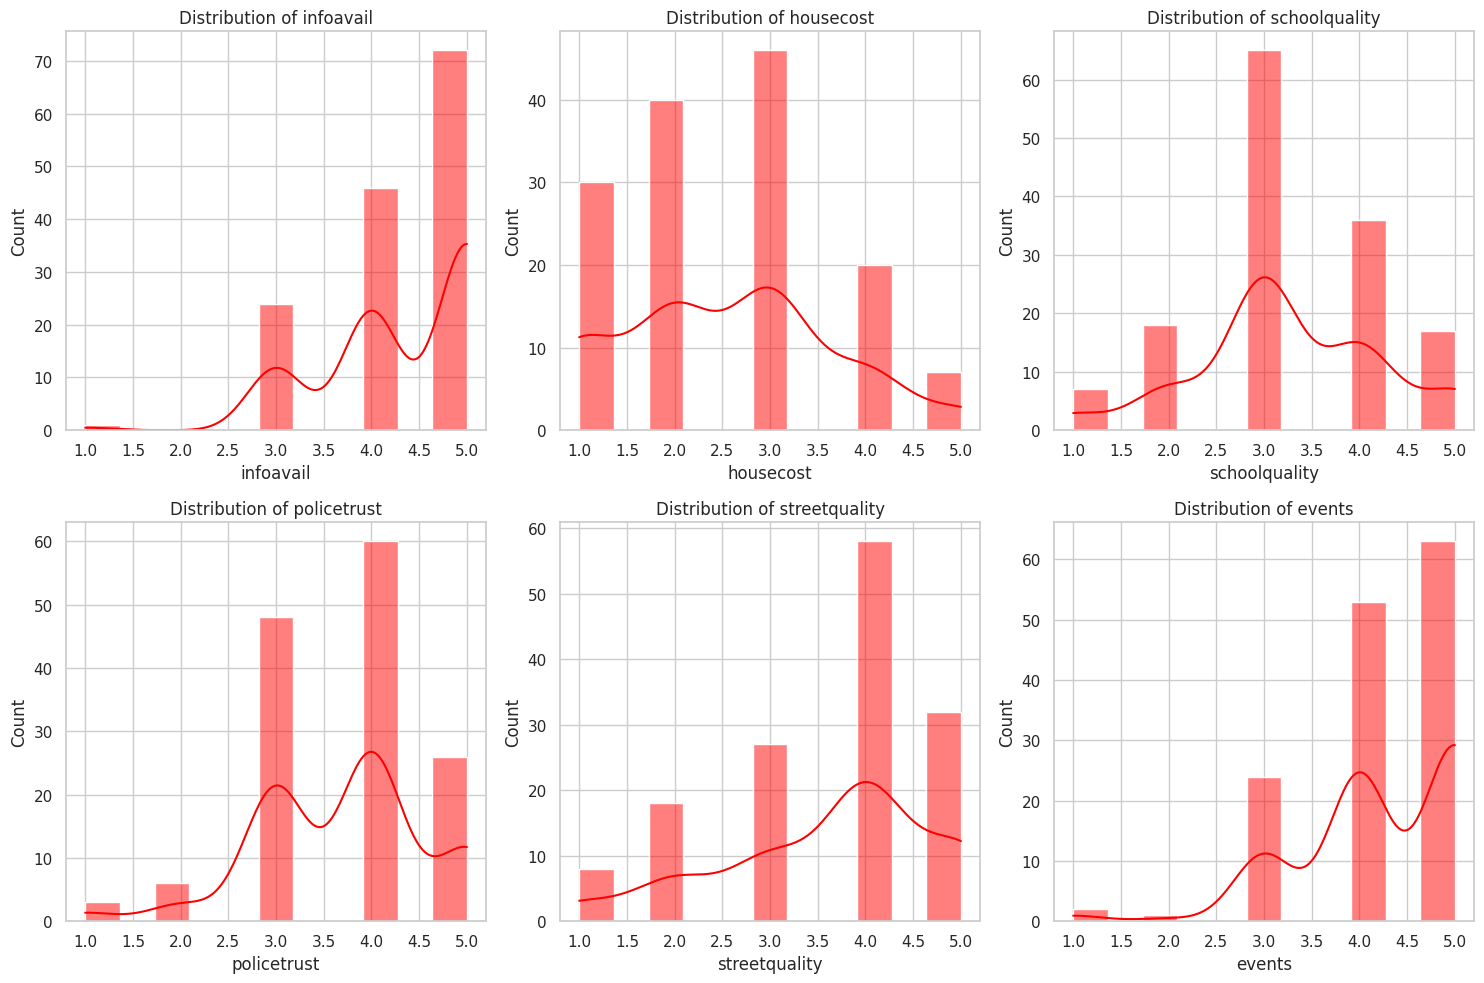

In [8]:
# data distribution
sns.set(style ='whitegrid')
features = ['infoavail', 'housecost', 'schoolquality', 'policetrust', 'streetquality', 'events']
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(hp[feature], kde=True, color='red')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
plt.tight_layout()
plt.show()

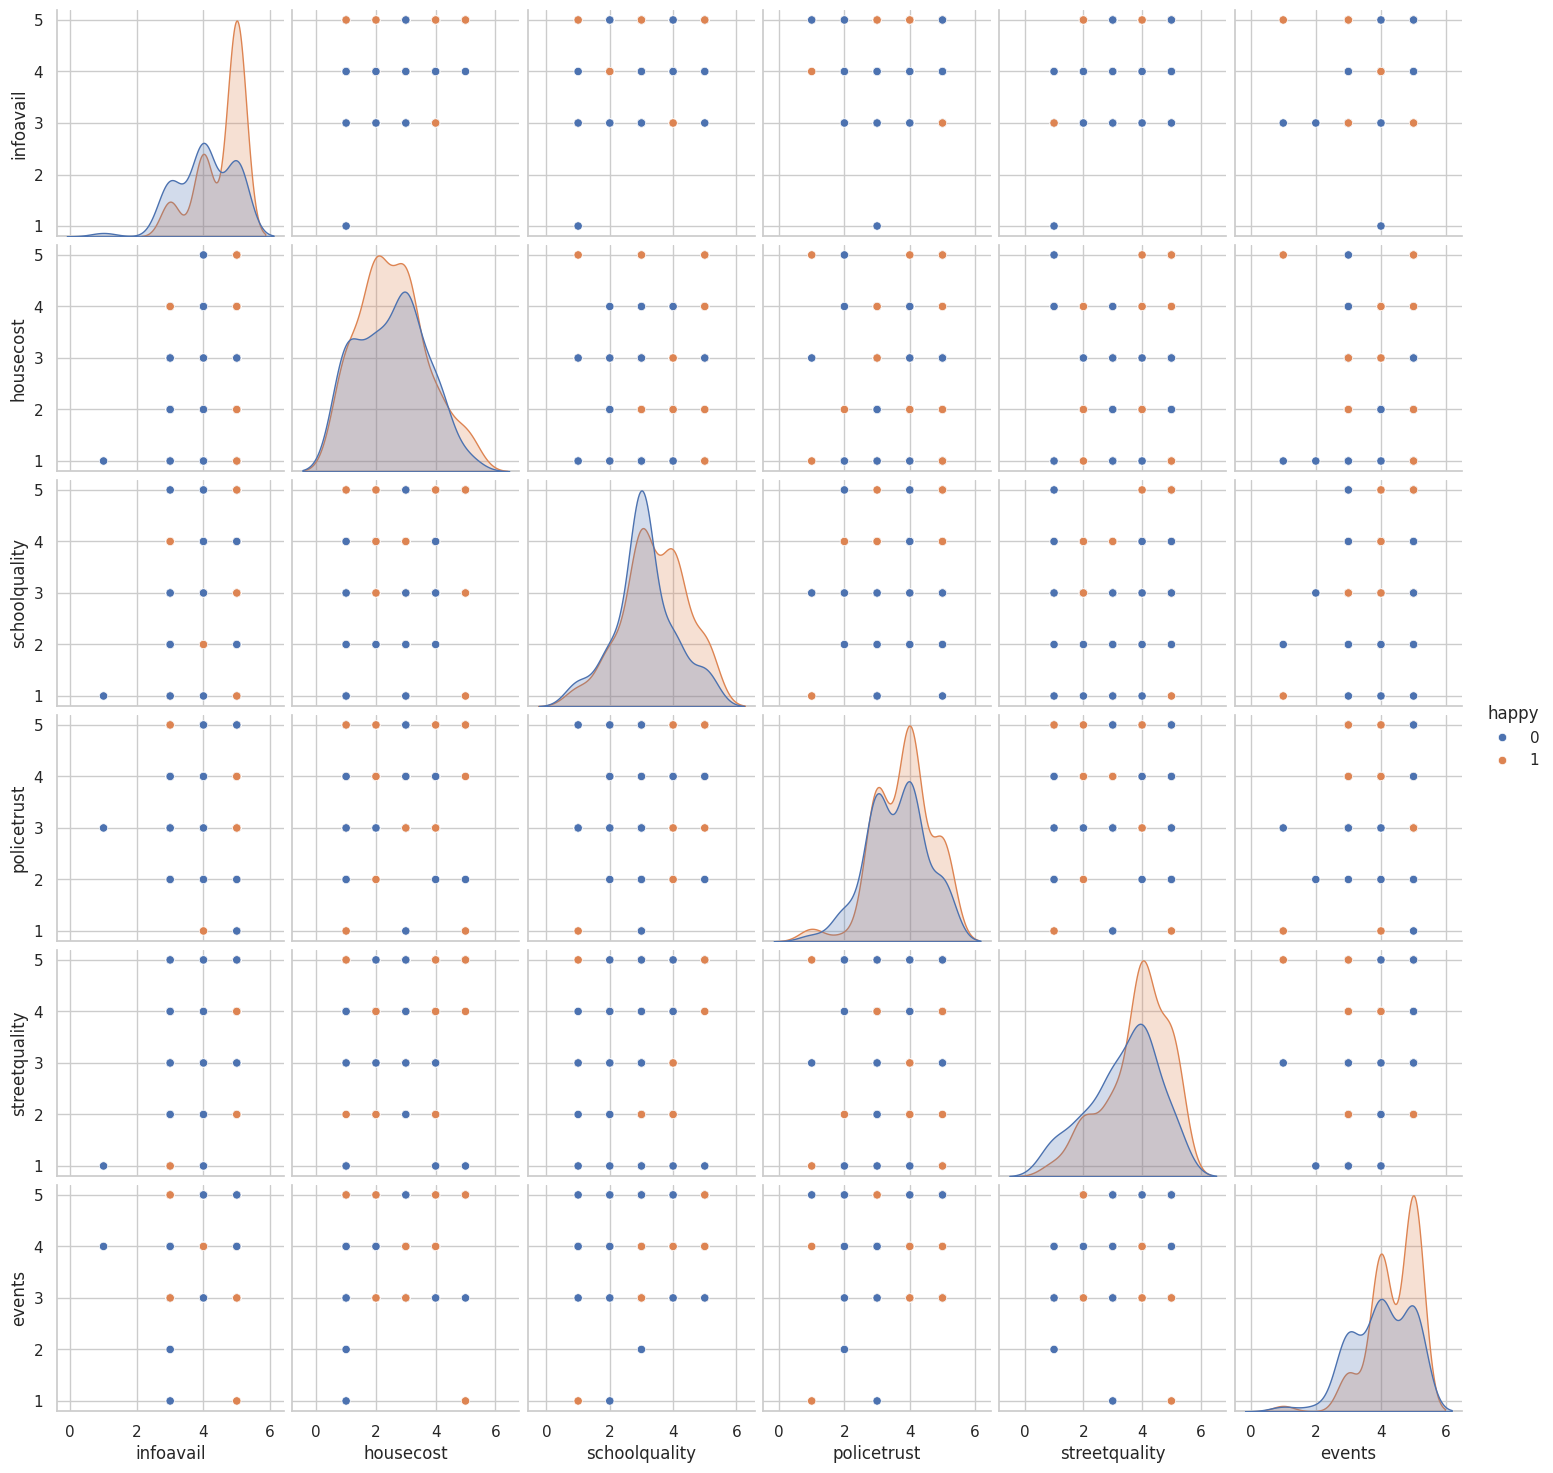

In [9]:
#paiplot
sns.pairplot(hp, hue='happy')

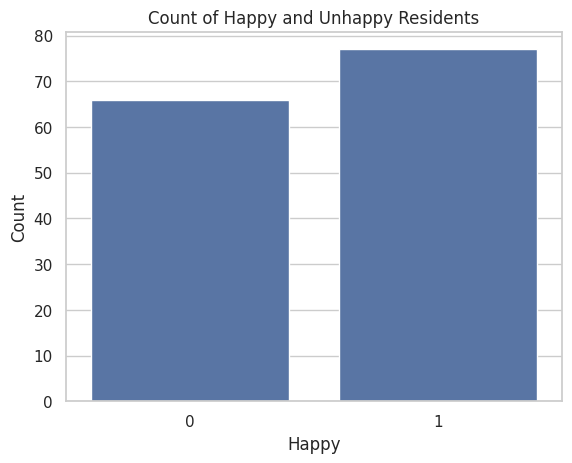

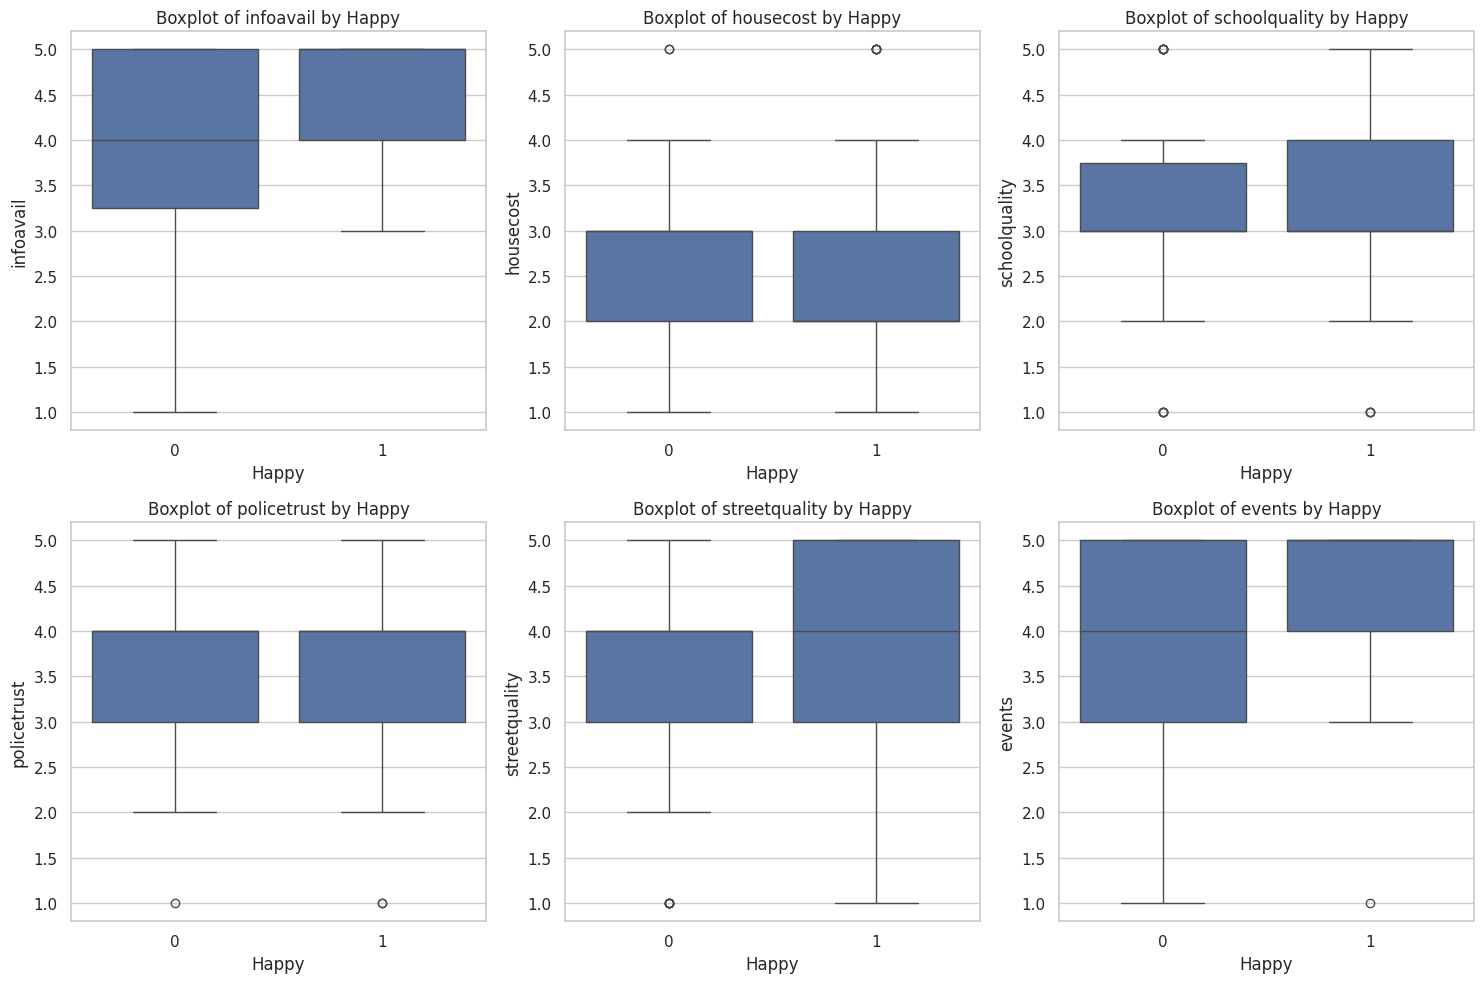

In [10]:
sns.countplot(x='happy', data=hp)
plt.title('Count of Happy and Unhappy Residents')
plt.xlabel('Happy')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(15, 10))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='happy', y=feature, data=hp)
    plt.title(f'Boxplot of {feature} by Happy')
    plt.xlabel('Happy')
    plt.ylabel(feature)
plt.tight_layout()
plt.show()

In [11]:
# % Of Happy and Unhappy people
print(f"Happy People %: {hp['happy'].value_counts(normalize=True)[1]*100:.2f}%")
print(f"Unhappy People %: {hp['happy'].value_counts(normalize=True)[0]*100:.2f}%")

Happy People %: 53.85%
Unhappy People %: 46.15%


In [12]:
# Identify the outliers and print
for feature in features:
    Q1 = hp[feature].quantile(0.25)
    Q3 = hp[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = hp[(hp[feature] < lower_bound) | (hp[feature] > upper_bound)]
    print(f"Outliers in {feature}:")
    print(outliers)
    print()

Outliers in infoavail:
    infoavail  housecost  schoolquality  policetrust  streetquality  events  \
50          1          1              1            3              1       4   

    happy  
50      0  

Outliers in housecost:
     infoavail  housecost  schoolquality  policetrust  streetquality  events  \
5            5          5              3            5              5       5   
67           5          5              5            2              5       5   
77           4          5              5            5              1       3   
86           5          5              5            5              5       5   
101          5          5              3            4              4       5   
105          5          5              5            5              5       5   
135          5          5              1            1              5       1   

     happy  
5        1  
67       0  
77       0  
86       1  
101      1  
105      1  
135      1  

Outliers in schoolqualit

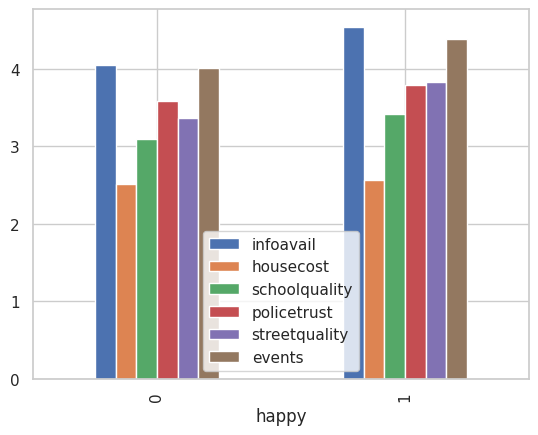

In [ ]:
# bar chart of mean values of each feature groupby happy and unhappy
hp.groupby('happy').mean().plot(kind='bar')
plt.show()

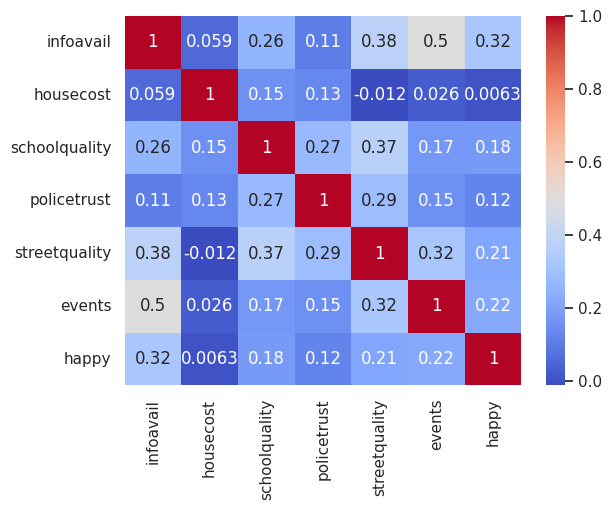

In [ ]:
# spearman correlation heatmap
corr_matrix = hp.corr(method='spearman')
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


The 'streetquality' variable has the
highest positive correlation with 'infoavail' (0.385) and 'events' (0.284), suggesting a moderate positive relationship.

'events' also has a relatively high positive correlation with 'infoavail' (0.396) and 'streetquality' (0.284).

The 'schoolquality' variable shows moderate positive correlations with 'infoavail' (0.264) and 'policetrust' (0.266).

The 'happy' variable has a moderate positive correlation with 'infoavail' (0.314), 'streetquality' (0.191), and 'events' (0.179).

# Machine Learning Models

##**Model 1**
logistic regression


In [ ]:
#feature selection
features = hp[['housecost','policetrust', 'schoolquality','events','infoavail','streetquality']]
X = features
y = hp['happy']
#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)


In [ ]:
#standardize data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)





In [ ]:
#train model
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)
#make predictions
y_pred = logreg.predict(X_test_scaled)


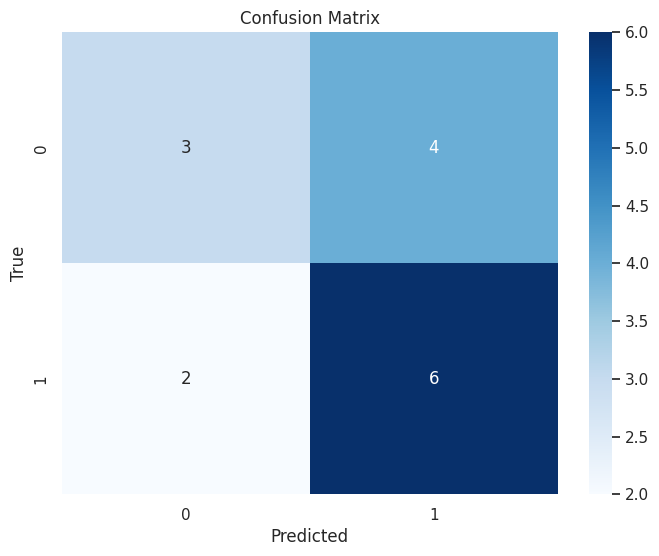

[[3 4]
 [2 6]]
              precision    recall  f1-score   support

           0       0.60      0.43      0.50         7
           1       0.60      0.75      0.67         8

    accuracy                           0.60        15
   macro avg       0.60      0.59      0.58        15
weighted avg       0.60      0.60      0.59        15

0.6


In [ ]:
# evaluate the model
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

In [ ]:
# stratified kfold hyperparameter tuning
from sklearn.model_selection import StratifiedKFold
param_grid_lg = [
      {'C': [0.001, 0.01, 0.1, 1, 10, 100],'penalty':['l1'], 'solver': ['liblinear']},
      {'C': [0.001, 0.01, 0.1, 1, 10, 100],'penalty':['l2'], 'solver': ['lbfgs']}
]

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize GridSearchCV with StratifiedKFold
grid_search = GridSearchCV(
    estimator=LogisticRegression(max_iter=500),
    param_grid=param_grid_lg,
    cv=skf,  # Use StratifiedKFold here
    scoring='accuracy',
    n_jobs=-1)

grid_search.fit(X_train_scaled, y_train)
best_logreg_model = grid_search.best_estimator_
print("Best parameters found: ", grid_search.best_params_)
print("Best accuracy score: ", grid_search.best_score_)



Best parameters found:  {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
Best accuracy score:  0.5938461538461539


In [ ]:
# Evaluate train score
train_score = best_logreg_model.score(X_train_scaled, y_train)
print(f"Train score after tuning: {train_score}")

# Evaluate test score
test_score = best_logreg_model.score(X_test_scaled, y_test)
print(f"Test score after tuning: {test_score}")


Train score after tuning: 0.6484375
Test score after tuning: 0.7333333333333333


In [ ]:
#confusion matrix and classification report
# Get predictions using the tuned model
y_pred_tuned_lg = best_logreg_model.predict(X_test_scaled)

# Confusion matrix and classification report after tuning
print(confusion_matrix(y_test, y_pred_tuned_lg))
print(classification_report(y_test, y_pred_tuned_lg))

[[5 2]
 [2 6]]
              precision    recall  f1-score   support

           0       0.71      0.71      0.71         7
           1       0.75      0.75      0.75         8

    accuracy                           0.73        15
   macro avg       0.73      0.73      0.73        15
weighted avg       0.73      0.73      0.73        15



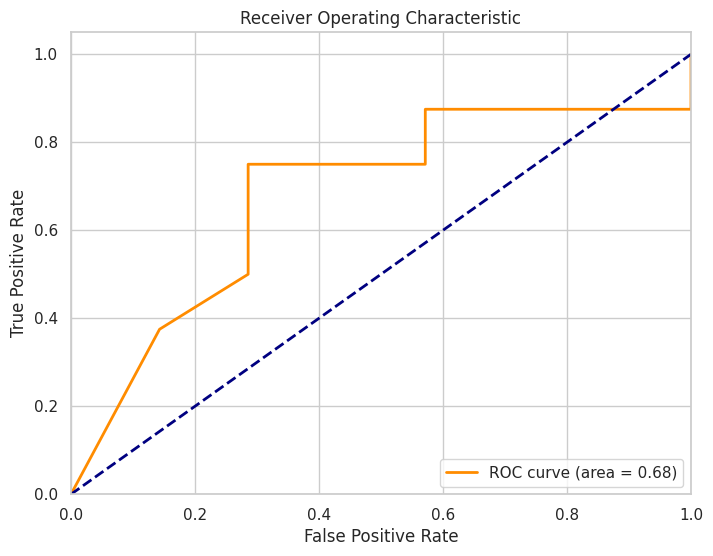

In [ ]:
#roc auc curve

# Get predicted probabilities for the positive class
y_probs = best_logreg_model.predict_proba(X_test_scaled)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))  # Set figure size for better visualization
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Add diagonal line for reference
plt.xlim([0.0, 1.0])  # Set x-axis limits
plt.ylim([0.0, 1.05])  # Set y-axis limits
plt.xlabel('False Positive Rate')  # Label x-axis
plt.ylabel('True Positive Rate')  # Label y-axis
plt.title('Receiver Operating Characteristic')  # Set plot title
plt.legend(loc="lower right")  # Display legend
plt.grid(True)  # Add grid for better readability
plt.show()

In [ ]:
#train score VS test score
print(logreg.score(X_train_scaled, y_train))
print(logreg.score(X_test_scaled, y_test))

0.6015625
0.6


# **Model 2**
##suport vector machine



In [ ]:
#fit SVM model
from sklearn.svm import SVC
svm = SVC(random_state=42)
svm.fit(X_train_scaled, y_train)
#make predictions
y_pred = svm.predict(X_test_scaled)
#train and test score
print(f"train score: {svm.score(X_train_scaled, y_train)}")
print(f"test score: {svm.score(X_test_scaled, y_test)}")

train score: 0.78125
test score: 0.5333333333333333


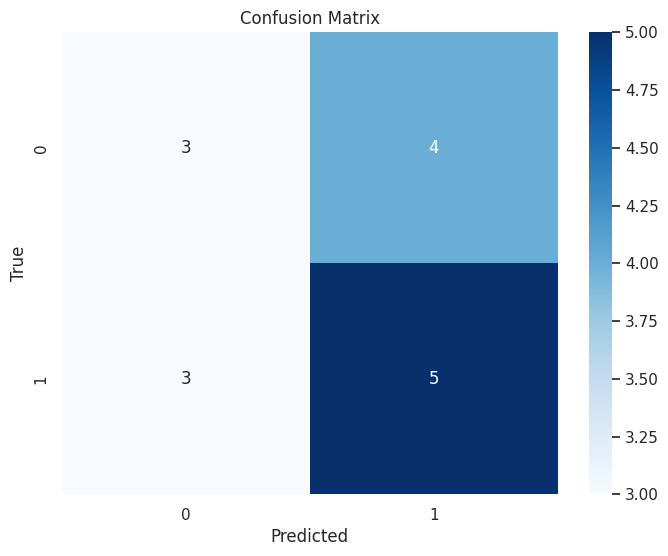

[[3 4]
 [3 5]]
              precision    recall  f1-score   support

           0       0.50      0.43      0.46         7
           1       0.56      0.62      0.59         8

    accuracy                           0.53        15
   macro avg       0.53      0.53      0.52        15
weighted avg       0.53      0.53      0.53        15



In [ ]:
#evaluate the model
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Precision: Precision measures the proportion of correctly predicted positive instances out of all instances predicted as positive.

Recall: Recall, also known as sensitivity or true positive rate, measures the proportion of correctly predicted positive instances out of all actual positive instances. high recall for class 1(0.86) indicates the model detects class 1 well,low recall for class 0 indicates the model struggles to detect class 0 instances correctly.

F1-score: The F1-score is the harmonic mean of precision and recall. It provides a balanced measure that combines both precision and recall.class 1 has better performance compared to class 0.


In [ ]:


# Define the parameter grid
param_grid_svm= {'C': [0.1, 1, 10, 100], 'kernel': ['linear', 'rbf', 'poly', 'sigmoid']}

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize GridSearchCV with StratifiedKFold
grid_search = GridSearchCV(SVC(random_state=42), param_grid=param_grid_svm, cv=skf, scoring='accuracy', n_jobs=1)

# Fit the model
grid_search.fit(X_train_scaled, y_train)

# Print best parameters and best score
print(f"Best parameter: {grid_search.best_params_}")
print(f"best Cross-validation score: {grid_search.best_score_}")

# Get the best model
best_svm_model = grid_search.best_estimator_

# Evaluate on the test model
print(f"test score: {best_svm_model.score(X_test_scaled, y_test)}")

Best parameter: {'C': 1, 'kernel': 'poly'}
best Cross-validation score: 0.6169230769230769
test score: 0.4666666666666667


In [ ]:
#confusion matrix and classification report
# Get predictions using the tuned model
y_pred_tuned_svm = best_svm_model.predict(X_test_scaled)

# Confusion matrix and classification report after tuning
print(confusion_matrix(y_test, y_pred_tuned_svm))
print(classification_report(y_test, y_pred_tuned_svm))

[[1 6]
 [2 6]]
              precision    recall  f1-score   support

           0       0.33      0.14      0.20         7
           1       0.50      0.75      0.60         8

    accuracy                           0.47        15
   macro avg       0.42      0.45      0.40        15
weighted avg       0.42      0.47      0.41        15



###**model 3**
**decision tree**


In [ ]:
#decision tree
from sklearn.tree import DecisionTreeClassifier
dt= DecisionTreeClassifier(random_state=42)
dt.fit(X_train_scaled, y_train)
y_pred = dt.predict(X_test_scaled)
print(f"train score: {dt.score(X_train_scaled, y_train)}")
print(f"test score: {dt.score(X_test_scaled, y_test)}")

train score: 0.9609375
test score: 0.5333333333333333


In [ ]:
# Define the parameter grid for hyperparameter tuning
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the Decision Tree model
dt = DecisionTreeClassifier(random_state=42)

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize GridSearchCV with StratifiedKFold
grid_search_dt = GridSearchCV(estimator=dt, param_grid=param_grid_dt,
                           cv=skf, scoring='accuracy', n_jobs=-1)

# Fit the model to the training data
grid_search_dt.fit(X_train_scaled, y_train)

# Get the best model and its hyperparameters
best_dt_model = grid_search_dt.best_estimator_
print("Best hyperparameters:", grid_search_dt.best_params_)

# Evaluate the best model on the test data
test_accuracy = best_dt_model.score(X_test_scaled, y_test)
print("Test accuracy with best model:", test_accuracy)

# Perform cross-validation on the best model (using StratifiedKFold)
cv_scores = cross_val_score(best_dt_model, X_train_scaled, y_train, cv=skf)
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", np.mean(cv_scores))

Best hyperparameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5}
Test accuracy with best model: 0.7333333333333333
Cross-validation scores: [0.61538462 0.61538462 0.65384615 0.64       0.56      ]
Mean cross-validation score: 0.6169230769230769


In [ ]:
#train test score for decision tree
print(f"train score: {best_dt_model.score(X_train_scaled, y_train)}")
print(f"test score: {best_dt_model.score(X_test_scaled, y_test)}")

train score: 0.75
test score: 0.7333333333333333


In [ ]:
#confusion matrix and classification report
# Get predictions using the tuned model
y_pred_tuned_dt = best_dt_model.predict(X_test_scaled)

# Confusion matrix and classification report after tuning
print(confusion_matrix(y_test, y_pred_tuned_dt))
print(classification_report(y_test, y_pred_tuned_dt))

[[5 2]
 [2 6]]
              precision    recall  f1-score   support

           0       0.71      0.71      0.71         7
           1       0.75      0.75      0.75         8

    accuracy                           0.73        15
   macro avg       0.73      0.73      0.73        15
weighted avg       0.73      0.73      0.73        15



# model 4

###random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    max_depth=5,
    min_samples_split=10,
    min_samples_leaf=5
)
rf.fit(X_train_scaled, y_train)
y_pred = rf.predict(X_test_scaled)
print(f"train score: {rf.score(X_train_scaled, y_train)}")
print(f"test score: {rf.score(X_test_scaled, y_test)}")


train score: 0.78125
test score: 0.6


In [ ]:
# Define the parameter grid
param_grid_rf = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 15],
    'min_samples_split': [2, 5, 8],
    'min_samples_leaf': [2, 4, 6],
    'criterion': ['gini', 'entropy']
}

# Create the Random Forest model
rf = RandomForestClassifier(random_state=42)

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize GridSearchCV with StratifiedKFold
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid_rf,
                          cv=skf, scoring='accuracy', n_jobs=-1)

# Fit the model and evaluate (similar to before)
try:
    grid_search = GridSearchCV(estimator=rf, param_grid=param_grid_rf,
                              cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train_scaled, y_train)

    # Print the best parameters and best score
    print("Best parameters found: ", grid_search.best_params_)
    print("Best accuracy score: ", grid_search.best_score_)

    # Get the best model
    best_rf_model = grid_search.best_estimator_

    # Evaluate the best model on the test data
    test_accuracy = best_rf_model.score(X_test_scaled, y_test)
    print("Train accuracy with best model: ", best_rf_model.score(X_train_scaled, y_train))
    print("Test accuracy with best model: ", test_accuracy)

except ValueError as e:
    print(f"Error during GridSearchCV: {e}")


Best parameters found:  {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 50}
Best accuracy score:  0.5935384615384616
Train accuracy with best model:  0.8203125
Test accuracy with best model:  0.6


In [ ]:
#confusion matrix and classification report
# Get predictions using the tuned model
y_pred_tuned_rf = best_rf_model.predict(X_test_scaled)

# Confusion matrix and classification report after tuning
print(confusion_matrix(y_test, y_pred_tuned_rf))
print(classification_report(y_test, y_pred_tuned_rf))


[[3 4]
 [2 6]]
              precision    recall  f1-score   support

           0       0.60      0.43      0.50         7
           1       0.60      0.75      0.67         8

    accuracy                           0.60        15
   macro avg       0.60      0.59      0.58        15
weighted avg       0.60      0.60      0.59        15



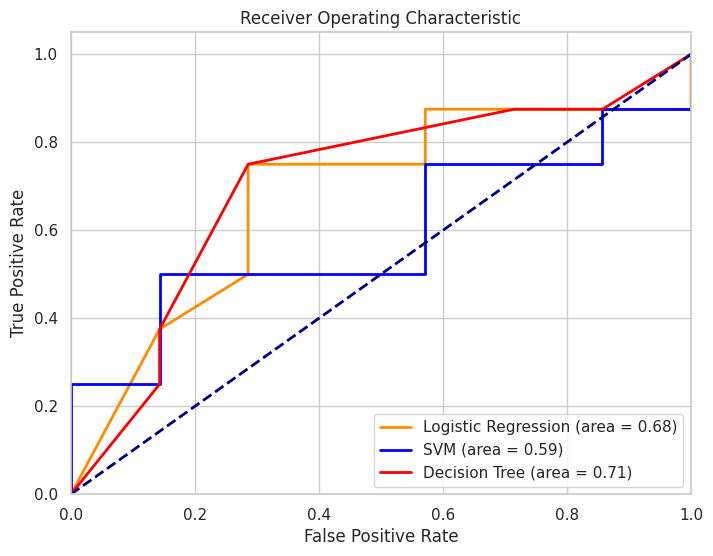

In [ ]:
#Plot the ROC curve for the SVM, Logistic Regressions, decision tree and random forest on the same plot
# 1. Get predicted probabilities for each model
y_probs_logreg = best_logreg_model.predict_proba(X_test_scaled)[:, 1]
y_probs_svm = svm.decision_function(X_test_scaled)  # For SVM, use decision_function
y_probs_dt = best_dt_model.predict_proba(X_test_scaled)[:, 1]

# 2. Calculate ROC curve and AUC for each model
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, y_probs_logreg)
roc_auc_logreg = auc(fpr_logreg, tpr_logreg)

fpr_svm, tpr_svm, _ = roc_curve(y_test, y_probs_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)



fpr_dt, tpr_dt, _ = roc_curve(y_test, y_probs_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

# 3. Plot ROC curves on the same plot
plt.figure(figsize=(8, 6))
plt.plot(fpr_logreg, tpr_logreg, color='darkorange', lw=2, label='Logistic Regression (area = %0.2f)' % roc_auc_logreg)
plt.plot(fpr_svm, tpr_svm, color='blue', lw=2, label='SVM (area = %0.2f)' % roc_auc_svm)
plt.plot(fpr_dt, tpr_dt, color='red', lw=2, label='Decision Tree (area = %0.2f)' % roc_auc_dt)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")


# Model 5

gradient boosting

In [ ]:
#boosting
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb.fit(X_train_scaled, y_train)
y_pred = gb.predict(X_test_scaled)
print(f"train score: {gb.score(X_train_scaled, y_train)}")
print(f"test score: {gb.score(X_test_scaled, y_test)}")

train score: 0.90625
test score: 0.6


In [ ]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
}

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_search_gb = GridSearchCV(
    estimator=gb,
    param_grid=param_grid,
    cv=skf,  # Use StratifiedKFold here
    scoring='accuracy',
    n_jobs=-1
)

grid_search_gb.fit(X_train_scaled, y_train)
print("Best parameters found: ", grid_search_gb.best_params_)
print("Best accuracy score: ", grid_search_gb.best_score_)
best_gb_model = grid_search_gb.best_estimator_

Best parameters found:  {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}
Best accuracy score:  0.6178461538461539


In [ ]:
#train test score with best_gb_model
print(f"train score: {best_gb_model.score(X_train_scaled, y_train)}")
print(f"test score: {best_gb_model.score(X_test_scaled, y_test)}")

train score: 0.8359375
test score: 0.5333333333333333


In [ ]:
#confusion matrix and classification report
# Get predictions using the tuned model
y_pred_tuned_gb = best_gb_model.predict(X_test_scaled)

# Confusion matrix and classification report after tuning
print(confusion_matrix(y_test, y_pred_tuned_gb))
print(classification_report(y_test, y_pred_tuned_gb))

[[2 5]
 [2 6]]
              precision    recall  f1-score   support

           0       0.50      0.29      0.36         7
           1       0.55      0.75      0.63         8

    accuracy                           0.53        15
   macro avg       0.52      0.52      0.50        15
weighted avg       0.52      0.53      0.51        15



# Method 6

### **Naive Bayes**


In [ ]:
# naive bayes model
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train_scaled, y_train)
y_pred = nb.predict(X_test_scaled)
print(f"train score: {nb.score(X_train_scaled, y_train)}")
print(f"test score: {nb.score(X_test_scaled, y_test)}")

train score: 0.6015625
test score: 0.6


In [ ]:
# Define parameter grid for alpha
param_grid = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]}

   # Initialize GridSearchCV
grid_search = GridSearchCV(GaussianNB(), param_grid, cv=5, scoring='accuracy')

   # Fit the model to the training data
grid_search.fit(X_train_scaled, y_train)

   # Print the best parameters and best score
best_nb_model = grid_search.best_estimator_
print("Best parameters found: ", grid_search.best_params_)
print("Best accuracy score: ", grid_search.best_score_)
#evaluate train test score
print(f"train score: {grid_search.best_estimator_.score(X_train_scaled, y_train)}")
print(f"test score: {grid_search.best_estimator_.score(X_test_scaled, y_test)}")

Best parameters found:  {'var_smoothing': 1e-09}
Best accuracy score:  0.5710769230769231
train score: 0.6015625
test score: 0.6


In [ ]:
#confusion matrix and classification report for naive bayes
# Get predictions using the tuned model
y_pred_tuned_nb = best_nb_model.predict(X_test_scaled)

# Confusion matrix and classification report after tuning
print(confusion_matrix(y_test, y_pred_tuned_nb))
print(classification_report(y_test, y_pred_tuned_nb))



[[3 4]
 [2 6]]
              precision    recall  f1-score   support

           0       0.60      0.43      0.50         7
           1       0.60      0.75      0.67         8

    accuracy                           0.60        15
   macro avg       0.60      0.59      0.58        15
weighted avg       0.60      0.60      0.59        15



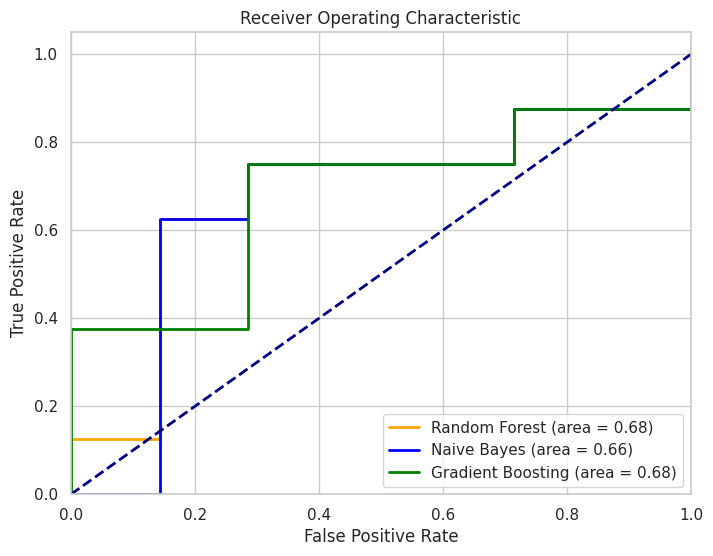

In [ ]:
#Plot the ROC curve for Logistic Regressions, naive bayes and gradient boosting on the same plot
#get predicted probabilities for each model

y_probs_nb = best_nb_model.predict_proba(X_test_scaled)[:, 1]
y_probs_gb = best_gb_model.predict_proba(X_test_scaled)[:, 1]
y_probs_rf = best_rf_model.predict_proba(X_test_scaled)[:, 1]
#calculate  ROC curve and AUC for each model
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_probs_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

fpr_nb, tpr_nb, _ = roc_curve(y_test, y_probs_nb)
roc_auc_nb = auc(fpr_nb, tpr_nb)

fpr_gb, tpr_gb, _ = roc_curve(y_test, y_probs_gb)
roc_auc_gb = auc(fpr_gb, tpr_gb)

# Plot ROC curves on the same plot
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='orange', lw=2, label='Random Forest (area = %0.2f)' % roc_auc_rf)
plt.plot(fpr_nb, tpr_nb, color='blue', lw=2, label='Naive Bayes (area = %0.2f)' % roc_auc_nb)
plt.plot(fpr_gb, tpr_gb, color='green', lw=2, label='Gradient Boosting (area = %0.2f)' % roc_auc_gb)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()



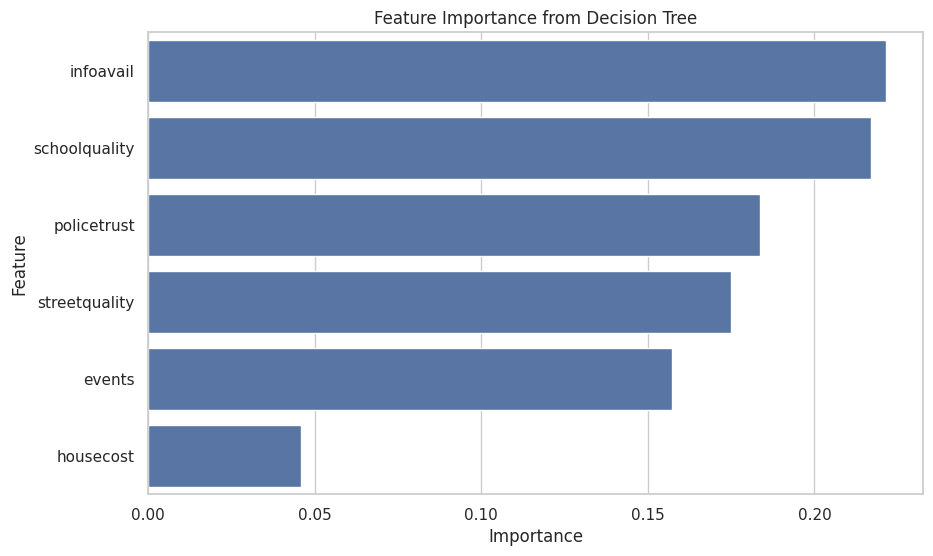

In [ ]:
#feature importance from decision tree
importances = best_dt_model.feature_importances_
feature_names = X.columns  # Assuming X is your feature dataframe

# Create a dataframe for visualization
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance from Decision Tree')
plt.show()

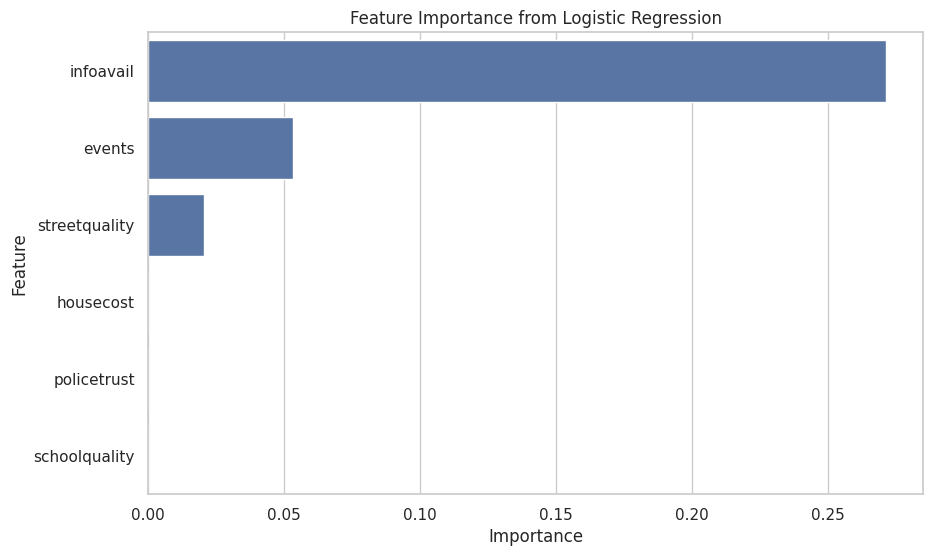

In [ ]:

# Feature importance for logistic regression
importances_lg = best_logreg_model.coef_[0]
feature_names_lg = X.columns

# Create a DataFrame for visualization
importance_df_lg = pd.DataFrame({'Feature': feature_names_lg, 'Importance': importances_lg})
importance_df_lg = importance_df_lg.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df_lg)
plt.title('Feature Importance from Logistic Regression')
plt.show()


###**conclusion**

The analysis suggests that city metrics, such as the availability of information, school quality, police trust, street quality, and social community events, can have an impact on residents' happiness. However, the model's performance indicates room for improvement, and further exploration and refinement of the model can potentially enhance its predictive power.

